# IMDB 영화리뷰  
IMDB : Internet Movie Data Base

---

## 1. Data 확인

### 1-1. Load

In [71]:
# IMDB 데이터 로드
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)


### 1-2. Check

In [2]:
print(len(X_train))

25000


In [4]:
# train 첫번째 내용
print(X_train[0])
print(len(X_train[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


### 1-3. Decode_review : 리뷰영문 확인  
- index로 이루어진 train data를 decode해서 원문을 확인

#### Word Indexing & reverse(value:key)

In [8]:
# 단어 인덱싱
word_index = imdb.get_word_index()

print(len(word_index))
word_index
# word_index.items()

88584


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [11]:
# key : value를 value : key로
reverse_word_index = [(value, key) for (key, value) in word_index.items()] # 배열
reverse_word_index = dict(reverse_word_index) # 딕셔너리화
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [16]:
# X_train[0]에 나오는 index를 여기에 입력하면 단어를 반환해줌.
print(reverse_word_index[1])
print(reverse_word_index[14])
print(reverse_word_index[22])
print(reverse_word_index[16])
print(reverse_word_index[43])
print(reverse_word_index[530])


the
as
you
with
out
themselves


#### decode_review 함수 & 실행

In [20]:
# index로 이루어진 train data를 decode해서 원문을 확인
def decode_review(text):
    return ' '.join(reverse_word_index.get(i) for i in text) # text는 list

In [25]:
첫번째리뷰 = decode_review(X_train[0])
첫번째리뷰

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [31]:
# set(y_train)으로 array의 unique()값을 확인할 수 있음
y_train[0] # 위 첫번쨰 리뷰는 긍정리뷰이다

1

---
# 2. Data 전처리

Q. maxlen이 작으면 정보력이 상실?
- maxlen을 100으로 하면 어느 한 리뷰가 150자일 때 초과 50개의 단어는 잘려서 사용하지 않게 된다.
- 목적이 리뷰가 긍정 또는 부정을 예측하는 것이기에 초중반(maxlen)의 리뷰을만을 가지고 예측해도 된다.


# 2-1.padding

In [72]:
from tensorflow.keras.preprocessing import sequence

# 각 리뷰의 앞100개의 단어만 잘라서 입력데이터의 size를 같게함
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [73]:
X_train

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]], dtype=int32)

## 2-2. Embedding test

In [35]:
# len(X_train[0])

100

In [38]:
# X_train.shape

(25000, 100)

In [94]:
embedding = Embedding(10000,100)
result = embedding(X_train)
result.shape

TensorShape([25000, 100, 100])

---
# 3. Modeling : CNN개념을 활용한 RNN(LSTM)  
CNN은 conv를 사용한다. 여기선 1차원 conv를 사용해서 특성을 추출한다.

In [74]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, 
                                    Dense, Dropout, Activation,
                                    LSTM,
                                    Conv1D, MaxPooling1D)


In [99]:
# 모델 구조
model = Sequential()

model.add(Embedding(20000, 100)) # 텍스트라서. 10000은 data load에서의 num_word값.(=단어 인덱싱 갯수) -> 이를 100개로 임베딩하여 자유도를 줄임
model.add(Dropout(0.5)) # 과적합방지를 위해서
model.add(Conv1D(64, 5, padding="valid", activation="relu", strides=1)) # 또다른 방법을 해볼려고
model.add(MaxPooling1D(pool_size=4))

model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation("sigmoid"))

# 모델 컴파일
model.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

# 모델 설명
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, None, 100)         2000000   
                                                                 
 dropout_14 (Dropout)        (None, None, 100)         0         
                                                                 
 conv1d_13 (Conv1D)          (None, None, 64)          32064     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, None, 64)         0         
 g1D)                                                            
                                                                 
 lstm_11 (LSTM)              (None, 55)                26400     
                                                                 
 dense_14 (Dense)            (None, 1)                 56        
                                                     

In [100]:
# 모델의 실행
history = model.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
249/250 [============================>.] - ETA: 0s - loss: 0.4563 - accuracy: 0.7600

KeyboardInterrupt: 

In [77]:
# 테스트 정확도 출력
# history.history["val_accuracy"]
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 4s 5ms/step - loss: 0.4093 - accuracy: 0.8454

 Test Accuracy: 0.8454


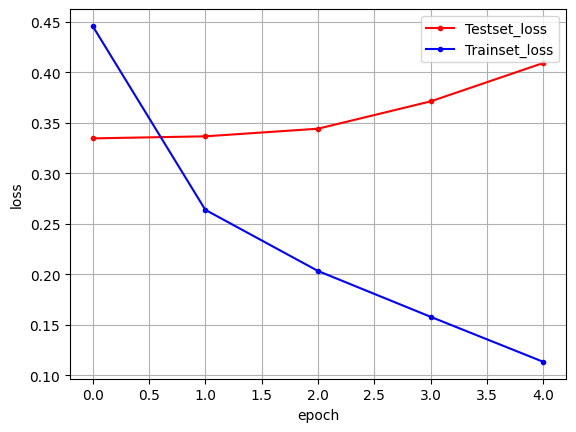

In [78]:
# 테스트셋, 학습셋의 오차
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

# 그래프로 표현
import matplotlib.pyplot as plt

X_len = np.arange(len(y_loss))
plt.plot(X_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(X_len, y_loss, marker=".", c="blue", label="Trainset_loss")

## 그리드 & 레이블 표시
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# 4. GRU : Gated Recurrent Unit - 조경현님 연구실 모델

In [84]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, 
                                    Dense, Dropout, Activation,
                                    GRU,
                                    Conv1D, MaxPooling1D)

In [89]:
# 모델 구조
model = Sequential()

model.add(Embedding(10000, 100)) # 텍스트라서. 10000은 data load에서의 num_word값.(=단어 인덱싱 갯수) -> 이를 100개로 임베딩하여 자유도를 줄임
model.add(Dropout(0.5)) # 과적합방지를 위해서

model.add(Conv1D(64, 5, padding="valid", activation="relu", strides=1)) # 또다른 방법을 해볼려고 cnn개념 채용
model.add(MaxPooling1D(pool_size=4))

model.add(GRU(55))
model.add(Dense(1))
model.add(Activation("sigmoid"))

# 모델 컴파일
model.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

# 모델 설명
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 100)         1000000   
                                                                 
 dropout_11 (Dropout)        (None, None, 100)         0         
                                                                 
 conv1d_10 (Conv1D)          (None, None, 64)          32064     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, None, 64)         0         
 g1D)                                                            
                                                                 
 gru_2 (GRU)                 (None, 55)                19965     
                                                                 
 dense_11 (Dense)            (None, 1)                 56        
                                                     

In [90]:
# 모델의 실행
history_GRU = model.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
250/250 [==============================] - 12s 42ms/step - loss: 0.4717 - accuracy: 0.7523 - val_loss: 0.3349 - val_accuracy: 0.8538
Epoch 2/5
250/250 [==============================] - 10s 40ms/step - loss: 0.2720 - accuracy: 0.8877 - val_loss: 0.3228 - val_accuracy: 0.8594
Epoch 3/5
250/250 [==============================] - 10s 40ms/step - loss: 0.2047 - accuracy: 0.9196 - val_loss: 0.3399 - val_accuracy: 0.8545
Epoch 4/5
250/250 [==============================] - 10s 41ms/step - loss: 0.1554 - accuracy: 0.9424 - val_loss: 0.3981 - val_accuracy: 0.8478
Epoch 5/5
250/250 [==============================] - 11s 42ms/step - loss: 0.1101 - accuracy: 0.9589 - val_loss: 0.4694 - val_accuracy: 0.8425


In [91]:
# 테스트 정확도 출력
# history_GRU.history["val_accuracy"]
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

# LSTM_test_Acc : 0.8454 / time : 55.2s
# GRU_test_Acc : 0.8425 / time : 52.3s
## GRU(conv안쓰면) : 0.8344 / time : 71.1s

782/782 [==============================] - 4s 5ms/step - loss: 0.4694 - accuracy: 0.8425

 Test Accuracy: 0.8425


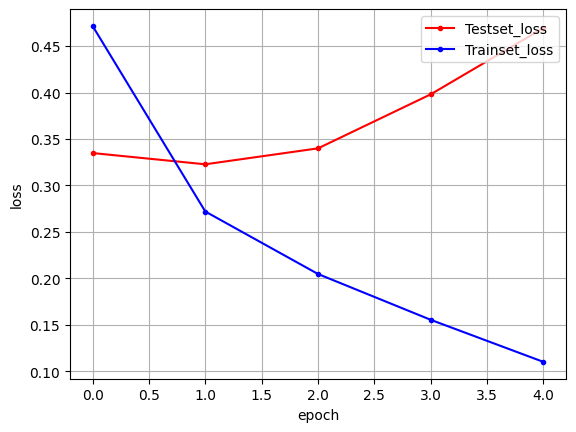

In [92]:
# 테스트셋, 학습셋의 오차
y_vloss = history_GRU.history["val_loss"]
y_loss = history_GRU.history["loss"]

# 그래프로 표현
import matplotlib.pyplot as plt

X_len = np.arange(len(y_loss))
plt.plot(X_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(X_len, y_loss, marker=".", c="blue", label="Trainset_loss")

## 그리드 & 레이블 표시
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

끝!